In [1]:
from ppi.database import Database
from ppi.intact_analyzer import IntActAnalyzer

PATH_TO_FILE = "../tests/data/test_ppi.tsv"

# Protein-protein interaction analyzer

**Table of contents**<a id='toc0_'></a>    
- [Get DataFrames from file](#toc1_)    
- [Graph](#toc2_)    
  - [Whole graph](#toc2_1_)    
  - [Filter graph for ...](#toc2_2_)    
    - [Detection method](#toc2_2_1_)    
    - [Confidence value](#toc2_2_2_)    
    - [Interaction type](#toc2_2_3_)    
    - [PubMed Identifier (pmid)](#toc2_2_4_)    
- [IntAct Analyzer](#toc3_)    
  - [Protein with highest beetweeness centrality](#toc3_1_)    
  - [Neighbors names](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
db = Database()
db.set_path_to_data_file(PATH_TO_FILE)

True

## <a id='toc1_'></a>[Get DataFrames from file](#toc0_)

In [3]:
# read from file
db.get_proteins()

,accession,name,taxid
id,,,
1,node_id1,name_1,1
2,node_id2,name_2,1
3,node_id3,name_3,1
4,node_id4,name_4,1
5,node_id5,name_5,1
6,node_id6,name_6,2
7,node_id7,name_7,1


In [4]:
# read from file
db.get_interactions()

,confidence_value,detection_method,interaction_type,pmid,protein_a_id,protein_b_id
id,,,,,,
1,0.1,dm1,it1,pmid1,1,2
2,0.2,dm2,it2,pmid1,2,3
3,0.3,dm3,it2,pmid1,2,4
4,0.4,dm1,it2,pmid1,2,5
5,0.5,dm4,it2,pmid1,5,6
6,0.6,dm1,it3,pmid1,2,6
7,0.7,dm5,it3,pmid1,6,7
8,0.8,dm2,it3,pmid1,2,3


In [5]:
db.import_data()

## <a id='toc2_'></a>[Graph](#toc0_)

### <a id='toc2_1_'></a>[Whole graph](#toc0_)

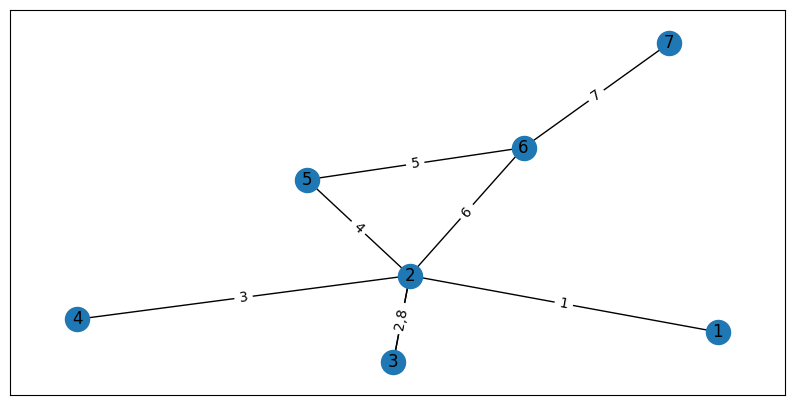

In [6]:
graph = db.get_graph()
iaa = IntActAnalyzer(graph)
iaa.draw_graph()

### <a id='toc2_2_'></a>[Filter graph for ...](#toc0_)

#### <a id='toc2_2_1_'></a>[Detection method](#toc0_)

In [7]:
db.get_detection_method_statistics()

,number
detection_method,
dm1,3
dm2,2
dm3,1
dm4,1
dm5,1


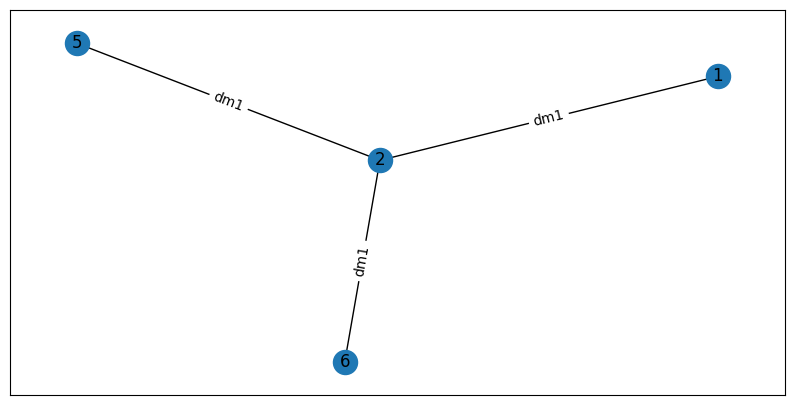

In [8]:
graph = db.get_graph(detection_method='dm1')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='detection_method')

#### <a id='toc2_2_2_'></a>[Confidence value](#toc0_)

Note that the parameter for `get_graph`  is **confidence_value_gte** (= means confidence_value greater than or equals), but the in `draw_graph` **edge_label = 'confidence_value'**

In [9]:
db.get_confidence_value_statistics()

,number
confidence_value,
0.1,1
0.2,1
0.3,1
0.4,1
0.5,1
0.6,1
0.7,1
0.8,1


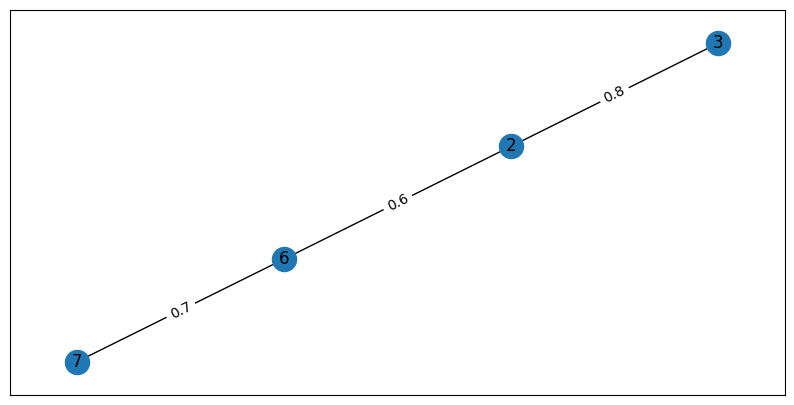

In [10]:
graph = db.get_graph(confidence_value_gte=0.6)
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='confidence_value')

#### <a id='toc2_2_3_'></a>[Interaction type](#toc0_)

In [11]:
db.get_interaction_type_statistics()

,number
interaction_type,
it1,1
it2,4
it3,3


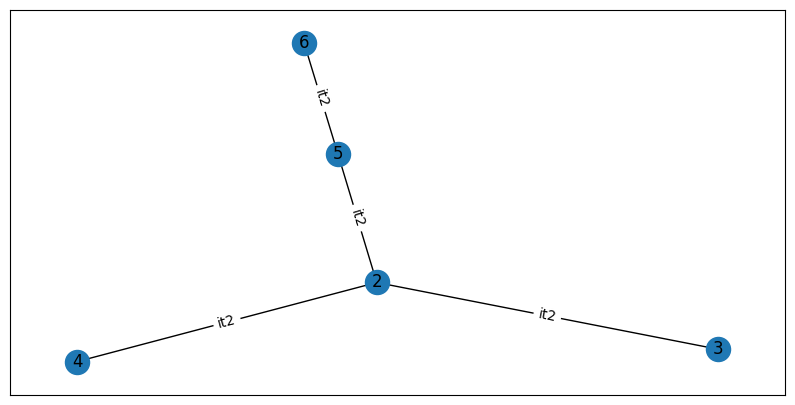

In [12]:
graph = db.get_graph(interaction_type='it2')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='interaction_type')

#### <a id='toc2_2_4_'></a>[PubMed Identifier (pmid)](#toc0_)

In [13]:
db.get_pmid_statistics()

,number
pmid,
pmid1,8


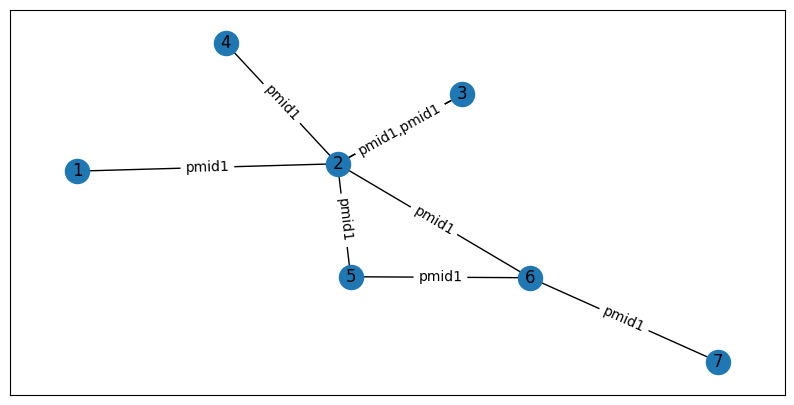

In [14]:
graph = db.get_graph(pmid='pmid1')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='pmid')

## <a id='toc3_'></a>[IntAct Analyzer](#toc0_)

### <a id='toc3_1_'></a>[Protein with highest beetweeness centrality](#toc0_)

In [15]:
graph = db.get_graph()
iaa = IntActAnalyzer(graph)
iaa.get_protein_with_highest_bc()

{'accession': 'node_id2',
 'name': 'name_2',
 'taxid': 1,
 'node_id': 2,
 'bc_value': 0.8}

### <a id='toc3_2_'></a>[Neighbors names](#toc0_)

to remember the names of the nodes:

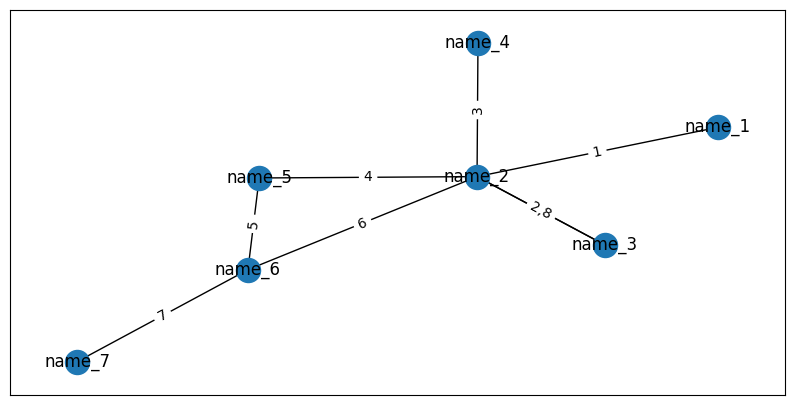

In [16]:
iaa.draw_graph(node_label='name')

In [17]:
iaa.get_neighbors_name('name_5')

['name_2', 'name_6']